In [1]:
import pandas as pd
import numpy as np
import re
import sklearn
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [2]:
cols = [f"A{x}" for x in range(20)]
cols.append("class")
data = pd.read_csv("../../../datasets/ring/ring.csv", names=cols)

In [3]:
data

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A11,A12,A13,A14,A15,A16,A17,A18,A19,class
0,849.0,2177.0,598.0,1689.0,3114.0,-3406.0,3799.0,-2642.0,1578.0,-181.0,...,1633.0,4664.0,1081.0,-1172.0,-166.0,578.0,1664.0,309.0,-3028.0,0
1,947.0,543.0,782.0,-449.0,-8.0,1316.0,756.0,-61.0,1604.0,1686.0,...,-382.0,1259.0,608.0,-2292.0,1008.0,2687.0,-1422.0,-606.0,2374.0,1
2,759.0,-314.0,898.0,-1743.0,2003.0,1117.0,911.0,136.0,-489.0,-144.0,...,112.0,598.0,474.0,2026.0,1431.0,-336.0,79.0,1123.0,302.0,1
3,531.0,1374.0,517.0,1226.0,1122.0,-4.0,-1227.0,2277.0,1083.0,888.0,...,1063.0,2454.0,587.0,-744.0,1216.0,916.0,-476.0,6.0,-477.0,1
4,-1443.0,1065.0,2071.0,207.0,-865.0,-786.0,2655.0,-366.0,971.0,-341.0,...,4195.0,-117.0,-2694.0,14.0,4097.0,1356.0,-944.0,-602.0,2348.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,607.0,1539.0,139.0,1378.0,-2178.0,-1.0,404.0,2064.0,653.0,-631.0,...,783.0,1106.0,1264.0,57.0,-413.0,136.0,-509.0,1423.0,1142.0,1
7396,-122.0,-1654.0,-395.0,278.0,-193.0,-463.0,1364.0,37.0,1998.0,2278.0,...,-1856.0,136.0,4604.0,-1117.0,-5735.0,173.0,1505.0,-1098.0,-5196.0,0
7397,-1854.0,1225.0,-2469.0,-351.0,1193.0,-3922.0,-2314.0,3565.0,2946.0,1463.0,...,2214.0,-1199.0,-1152.0,-1815.0,1051.0,-2244.0,2871.0,-3462.0,1619.0,0
7398,2604.0,-1541.0,1298.0,-742.0,-238.0,-1004.0,127.0,1056.0,-27.0,33.0,...,45.0,241.0,-635.0,1274.0,157.0,602.0,606.0,573.0,-751.0,1


In [4]:
data_2d = data[["A0","A1","class"]]

In [5]:
data_2d

,A0,A1,class
0,849.0,2177.0,0
1,947.0,543.0,1
2,759.0,-314.0,1
3,531.0,1374.0,1
4,-1443.0,1065.0,0
...,...,...,...
7395,607.0,1539.0,1
7396,-122.0,-1654.0,0
7397,-1854.0,1225.0,0
7398,2604.0,-1541.0,1


In [6]:
class0 = data_2d[data_2d["class"] == 0]
class1 = data_2d[data_2d["class"] == 1]

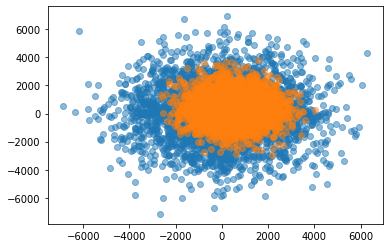

In [7]:
plt.scatter(class0["A0"], class0["A1"], alpha=0.5)
plt.scatter(class1["A0"], class1["A1"], alpha=0.5)

(array([  19.,  100.,  325.,  865., 1069.,  733.,  421.,  160.,   37.,
           7.]),
 array([-2623. , -1959.2, -1295.4,  -631.6,    32.2,   696. ,  1359.8,
         2023.6,  2687.4,  3351.2,  4015. ]),
 <a list of 10 Patch objects>)

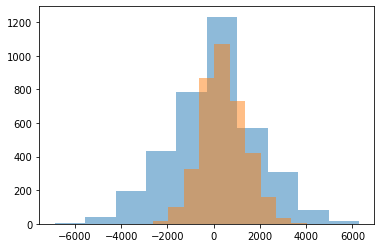

In [8]:
plt.hist(class0["A0"], alpha=0.5)
plt.hist(class1["A0"], alpha=0.5)

(array([  14.,   53.,  234.,  528., 1206.,  812.,  577.,  232.,   65.,
          15.]),
 array([-2926., -2255., -1584.,  -913.,  -242.,   429.,  1100.,  1771.,
         2442.,  3113.,  3784.]),
 <a list of 10 Patch objects>)

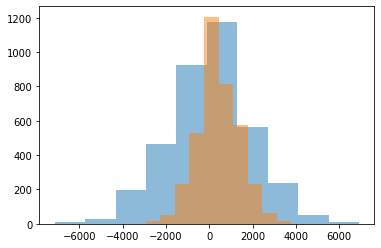

In [9]:
plt.hist(class0["A1"], alpha=0.5)
plt.hist(class1["A1"], alpha=0.5)

# Visualizing Mondrian

In [43]:
"""
class0 = pd.DataFrame()
mu, sigma = 0,4
class0["A0"] = np.random.normal(mu, sigma, 30)
class0["A1"] = np.random.normal(mu, sigma, 30)

class1 = pd.DataFrame()

mu, sigma = 10,4

class1["A0"] = np.random.normal(mu, sigma, 30)
class1["A1"] = np.random.normal(mu, sigma, 30)
"""

all_points = pd.read_csv("2d_mondrian_viz.csv", names=["A0", "A1", "class"])
all_points.head()

,A0,A1,class
0,7.560421,12.489247,1
1,3.986118,6.562176,1
2,8.073962,12.330555,1
3,11.499402,6.183075,1
4,12.535152,13.120925,1


In [44]:
class1 = all_points[all_points["class"] == 1]
class0 = all_points[all_points["class"] == 0]

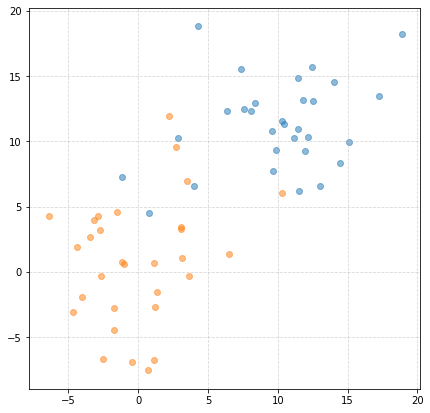

In [97]:
fig, ax = plt.subplots(1)

fig.set_figheight(7)
fig.set_figwidth(7)

plt.grid(b=True, which='major', linestyle='--', alpha=0.5)
plt.scatter(class1["A0"], class1["A1"], alpha=0.5)
plt.scatter(class0["A0"], class0["A1"], alpha=0.5)

plt.show()

## Anonymizing...

In [72]:
data = pd.read_csv("2d_mondrian_viz_3anon.csv", names=["A0", "A1", "class"])

In [73]:
data.head()

,A0,A1,class
0,(3.47583688671195:10.411401108088],(12.4892474660827:18.85349494509787],1
1,(3.47583688671195:9.6600065084176],[-7.493730161959119:8.31800099226492],1
2,(3.47583688671195:10.411401108088],(10.9282701280333:12.4892474660827],1
3,(9.6600065084176:18.869838111837957],[-7.493730161959119:8.31800099226492],1
4,(12.4304649437197:18.869838111837957],(10.9282701280333:18.85349494509787],1


In [74]:
def parse_range(x):
    if isinstance(x, float):
        val = float(x)
        return val, val

    vals = re.split(':', x[1:-1])
    vals = [bound[:-2] for bound in vals]
    low = float(vals[0])
    high = float(vals[1])
    return low, high

In [75]:
for col in data.columns[:-1]:
        mins, maxs = [], []
        for bounds in data[col]:
            lo,hi = parse_range(bounds)
            mins.append(lo)
            maxs.append(hi)

        data[f"{col}_min"] = mins
        data[f"{col}_max"] = maxs

        data = data.drop(col, axis=1)

In [76]:
data.head()

,class,A0_min,A0_max,A1_min,A1_max
0,1,3.475837,10.411401,12.489247,18.853495
1,1,3.475837,9.660007,-7.493730,8.318001
2,1,3.475837,10.411401,10.928270,12.489247
3,1,9.660007,18.869838,-7.493730,8.318001
4,1,12.430465,18.869838,10.928270,18.853495


In [77]:
data = data.drop_duplicates()

In [81]:
data.shape

(20, 5)

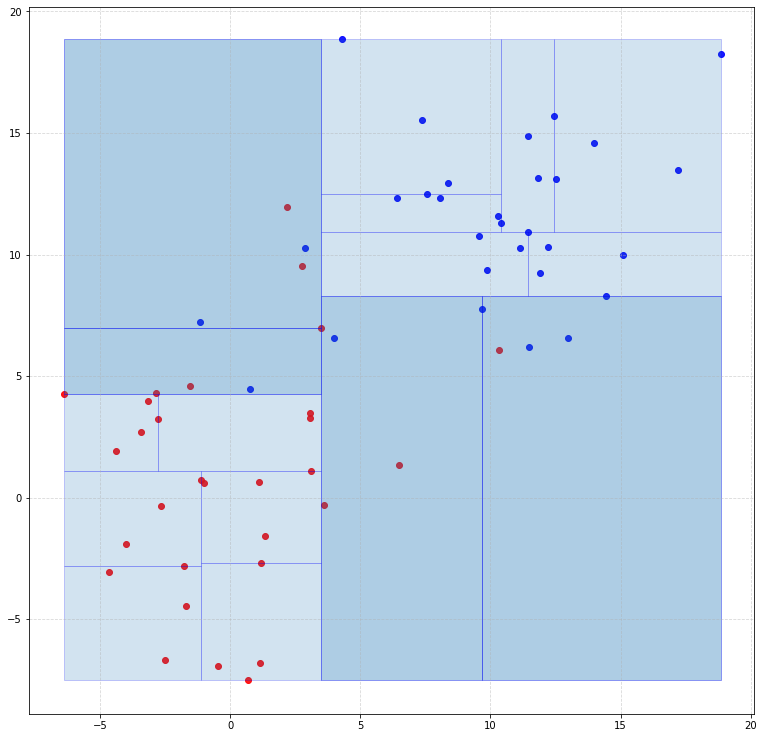

In [93]:
points = all_points

fig, ax = plt.subplots(1)

fig.set_figheight(13)
fig.set_figwidth(13)
plt.grid(b=True, which='major', linestyle='--', alpha=0.5)

plt.scatter(class1["A0"], class1["A1"], alpha=0.9, color="b")
plt.scatter(class0["A0"], class0["A1"], alpha=0.9, color="r")


rects = []
for x in range(len(data)):
    row = data.iloc[x]
    
    x_left = row["A0_min"]
    width = row["A0_max"] - x_left
    y_bottom = row["A1_min"]
    height = row["A1_max"] - y_bottom
    
    r = Rectangle((x_left, y_bottom), width, height)
    rects.append(r)
    
    
pc = PatchCollection(rects, alpha=0.2, edgecolors="b")
ax.add_collection(pc)
